# Di-Know: Diabetes prediction using machine learning models

The notebook contains code for EDA and ML model training and testing

In [1]:
!pip install matplotlib

# Import datasets and libraries

In [66]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet
import xgboost as xgb

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve 
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import numpy as np

In [67]:
df= pd.read_csv("D:\Ash_ML\ML_web\Diabetes_proj\datasets\diabetes_dataset.csv")

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\ashwi\AppData\Local\Temp\ipykernel_6420\1539008674.py:1: SyntaxWarning: invalid escape sequence '\A'
  df= pd.read_csv("D:\Ash_ML\ML_web\Diabetes_proj\datasets\diabetes_dataset.csv")


In [68]:
# Correlation matrix
correlation_matrix = df.corr()
# Correlation with the target column 'Outcome'
correlation_with_target = correlation_matrix['Outcome'].sort_values(ascending=True)
print("Correlation with target Outcome:\n", correlation_with_target)

#INFERENCE: Wesee that glucose levels have the highest corelation with diabetic outcome followed by BMI and Age. Lowest correlation for blood pressure.

Correlation with target Outcome:
 BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
DiabetesPedigreeFunction    0.173844
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.292695
Glucose                     0.466581
Outcome                     1.000000
Name: Outcome, dtype: float64


In [69]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [70]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### EDA

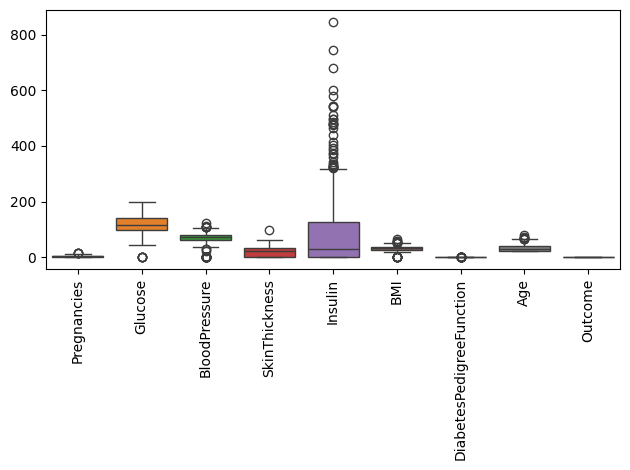

In [71]:
import seaborn as sns
sns.boxplot(data=df)  #making a box plot to visualize the spread of data across all the columns

plt.xticks(rotation=90) # Rotate x-axis labels by 90 degrees
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


In [72]:
print(f"shape of dataset, {df.shape}")

shape of dataset, (768, 9)


In [73]:
df.info()
 #shows zero null values in all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [74]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [75]:
missing_values = df.isnull().sum()

print("Missing values count:\n", missing_values)

Missing values count:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [76]:
class_counts = df['Outcome'].value_counts()
class_counts

Outcome
0    500
1    268
Name: count, dtype: int64

## Some inference from the statstical data:

1. Insulin seems to have huge outlier issue. The 75th percentile is around 127 units, while the max is more than 800 units.
2. Some features have zero values (no physiological logic): e.g., Glucose, BloodPressure, BMI. Can replace zeros with np.nan and then impute (mean, median, or KNN imputation).

# Data pre-processing: Missing values and outliers

### Handling zeros in Glucose, BP, BMI and insulin

In [77]:
import numpy as np

# columns where zero is not a valid value
cols_with_invalid_zeros = ['Glucose', 'BloodPressure', 'BMI', 'Insulin']

# Replace zeros with NaN
df[cols_with_invalid_zeros] = df[cols_with_invalid_zeros].replace(0, np.nan)



In [78]:
df.isnull().sum()  

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness                 0
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

As shown above, missing values for glucose, BMI and BP are quite small when compared to insulin. We can use 'median' to impute the missing values of the three features. Median is robust to outliers and for a small number of missing values, median imputation will not distort the overall distribution.

In [79]:
# Impute missing values with median

df['Glucose'] = df['Glucose'].fillna(df['Glucose'].median())

df['BMI'] = df['BMI'].fillna(df['BMI'].median())

In [80]:
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].median())

In [81]:
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].median())

In [82]:
df.isnull().sum()  

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

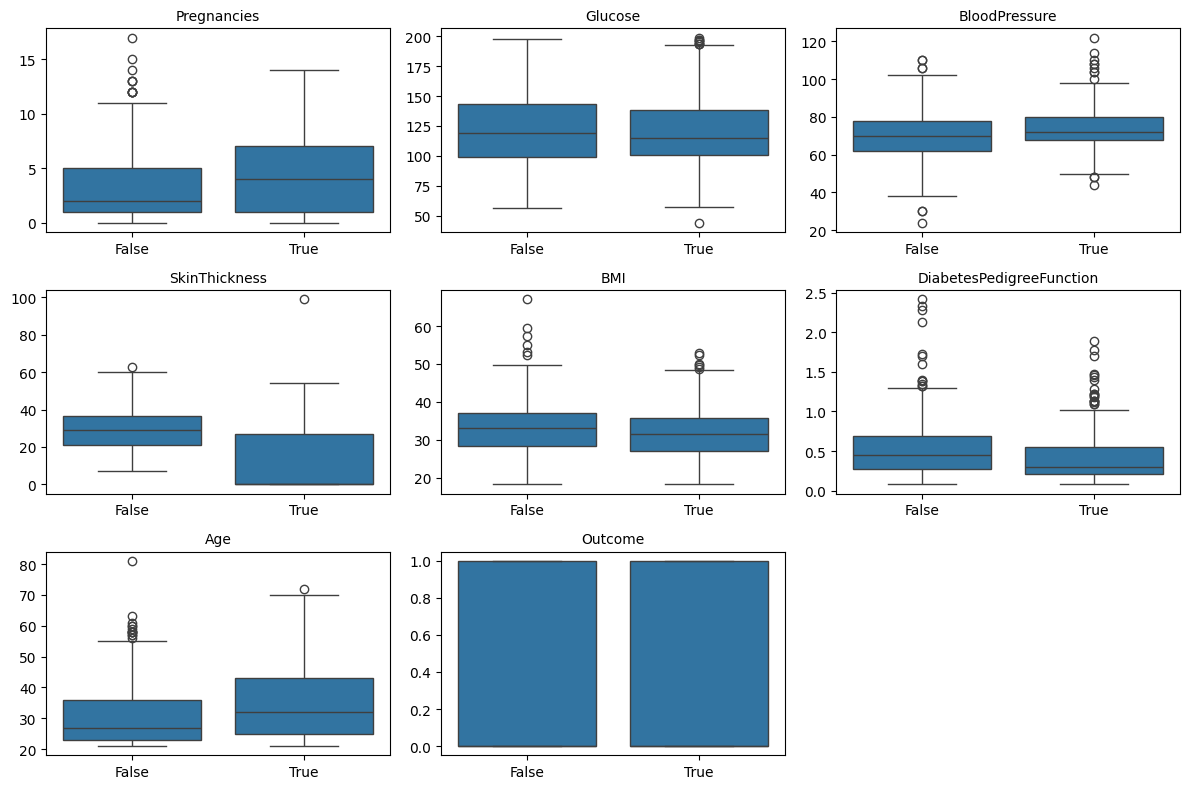

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns


df['Insulin_missing'] = df['Insulin'].isna()

# Features to compare
features_to_compare = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


fig, axes = plt.subplots(3, 3, figsize=(12, 8))  # Adjust figsize for compact view
axes = axes.flatten()

#comparing the features against the missing values in insulin (True or False)

for i, feature in enumerate(features_to_compare):
    sns.boxplot(x='Insulin_missing', y=feature, data=df, ax=axes[i])
    axes[i].set_title(feature, fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


The above plots show box plots representing relationships between missing/non-missing values in Insulin compared to other features. More specifically, features like Age, Skin thicknesS seem to show more relation w.r.t inssulin. But, I do not seem to find a meangiful relationship based on real-world intution for the MAR based on Age and Skin thickness. So, I will not still consider this as a serious case of MAR. But, will use KNN-based imputations given the large number of missing values in the Insulin feature.

In [84]:
#check group means
check = pd.DataFrame(df.groupby('Insulin_missing')[features_to_compare].mean())
check

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
Insulin_missing,,,,,,,,
False,3.286802,122.601523,70.654822,29.106599,33.070558,0.525543,30.814721,0.329949
True,4.433155,120.660428,74.211230,11.508021,31.806952,0.415340,35.796791,0.368984


In [85]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,394.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,20.536458,155.548223,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,15.952218,118.775855,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,0.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


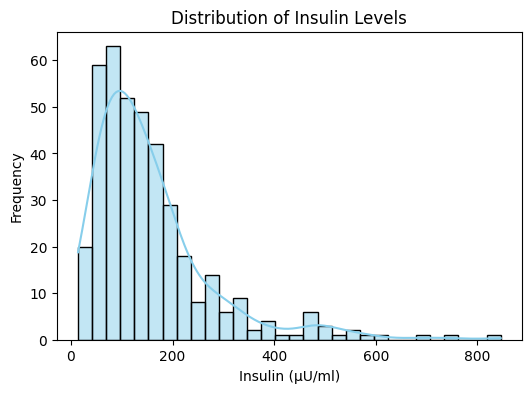

In [86]:


plt.figure(figsize=(6,4))
sns.histplot(df['Insulin'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Insulin Levels')
plt.xlabel('Insulin (µU/ml)')
plt.ylabel('Frequency')
plt.show()


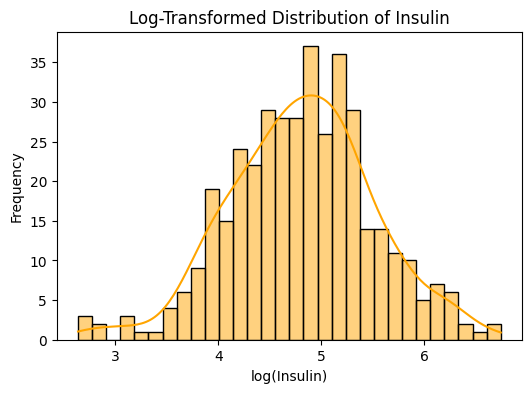

In [87]:


plt.figure(figsize=(6,4))
sns.histplot(np.log(df['Insulin']), kde=True, bins=30, color='orange')
plt.title('Log-Transformed Distribution of Insulin')
plt.xlabel('log(Insulin)')
plt.ylabel('Frequency')
plt.show()


In [88]:
df.isna().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
Insulin_missing               0
dtype: int64

In [89]:
df.drop(columns=['Insulin_missing'], inplace=True)

Imputing the Insulin missing values using KNN method. Since the insulin feature seems to dealing with MAR (missing at random) misisng value problem, it is best to use KNN-based imputation for the feature.

In [90]:
from sklearn.impute import KNNImputer
import pandas as pd


features_for_imputation = ['Insulin','Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age' ]

# Initialize KNN imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform') 

# Fit and transform the data
df[features_for_imputation] = imputer.fit_transform(df[features_for_imputation])

# Check missing values after imputation
print(df.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [91]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

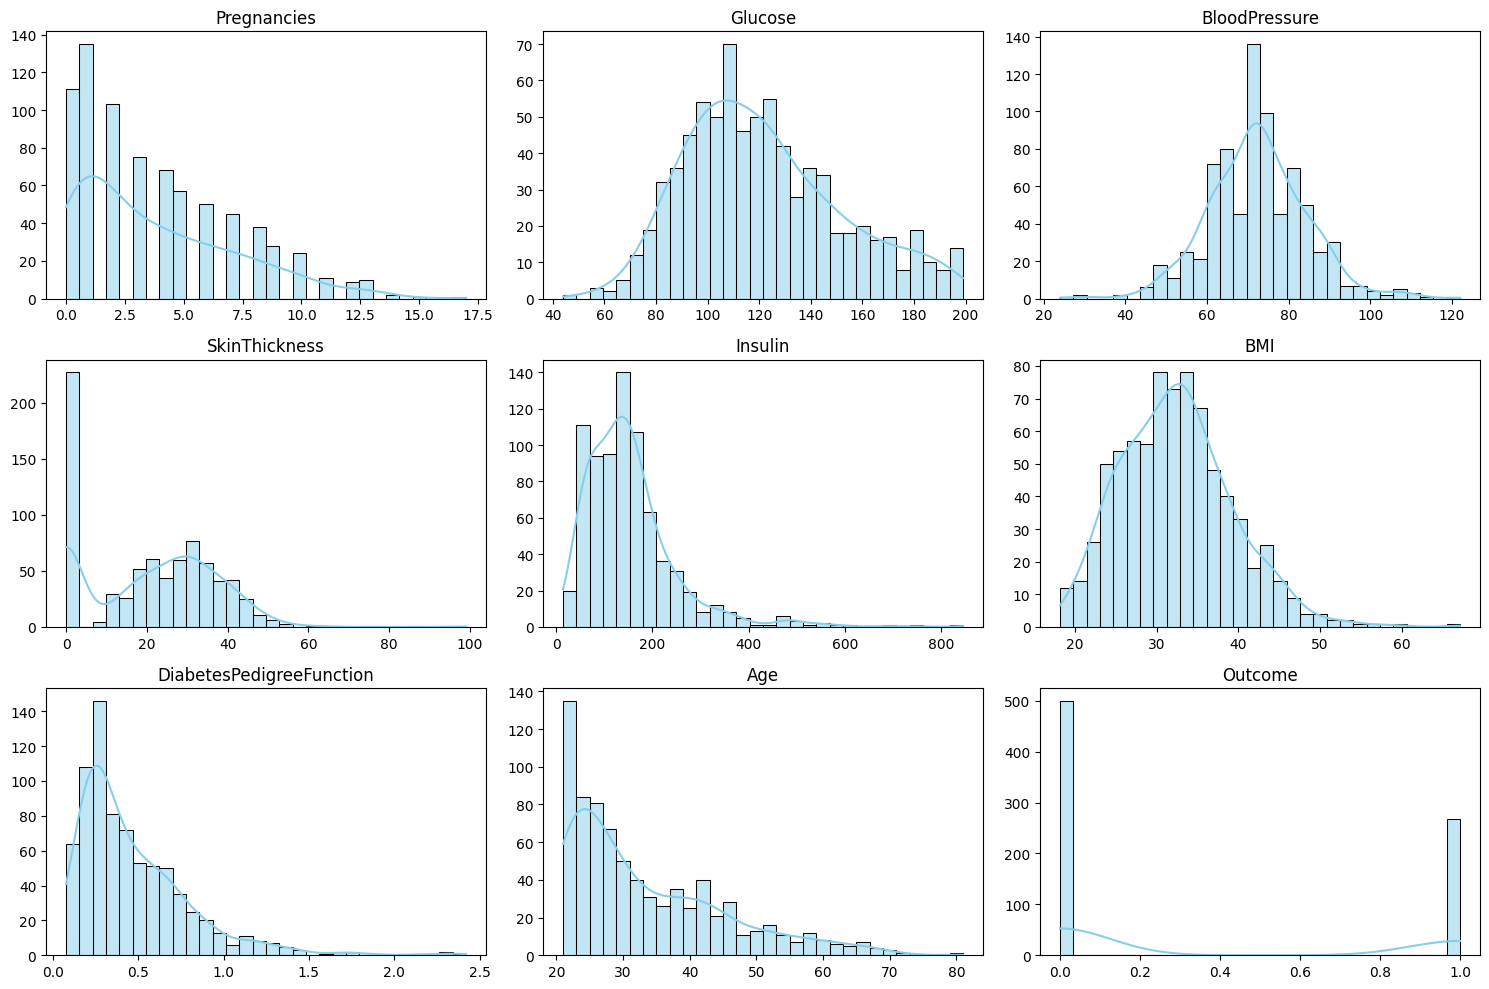

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features to plot
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
            'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Set up the grid for subplots
n_cols = 3
n_rows = (len(features) + n_cols - 1) // n_cols  # calculate rows needed
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()  # flatten to 1D array for easy iteration

# Loop through features and plot histogram for each
for i, feature in enumerate(features):
    sns.histplot(df[feature], kde=True, bins=30, ax=axes[i], color='skyblue')
    axes[i].set_title(feature)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Log transformation on skewed data

In [93]:
import numpy as np

# Log-transform skewed features (added 1 to avoid log(0))
for col in ['Insulin', 'DiabetesPedigreeFunction', 'Pregnancies', 'SkinThickness']:
    df[col] = np.log1p(df[col])



In [94]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,1.310613,121.656250,72.386719,2.354041,4.862864,32.455208,0.365317,33.240885,0.348958
std,0.769830,30.438286,12.096642,1.557527,0.590194,6.875177,0.198510,11.760232,0.476951
min,0.000000,44.000000,24.000000,0.000000,2.708050,18.200000,0.075107,21.000000,0.000000
25%,0.693147,99.750000,64.000000,0.000000,4.488636,27.500000,0.218131,24.000000,0.000000
50%,1.386294,117.000000,72.000000,3.178054,4.915591,32.300000,0.316633,29.000000,0.000000
75%,1.945910,140.250000,80.000000,3.496508,5.226820,36.600000,0.486277,41.000000,1.000000
max,2.890372,199.000000,122.000000,4.605170,6.741701,67.100000,1.229641,81.000000,1.000000


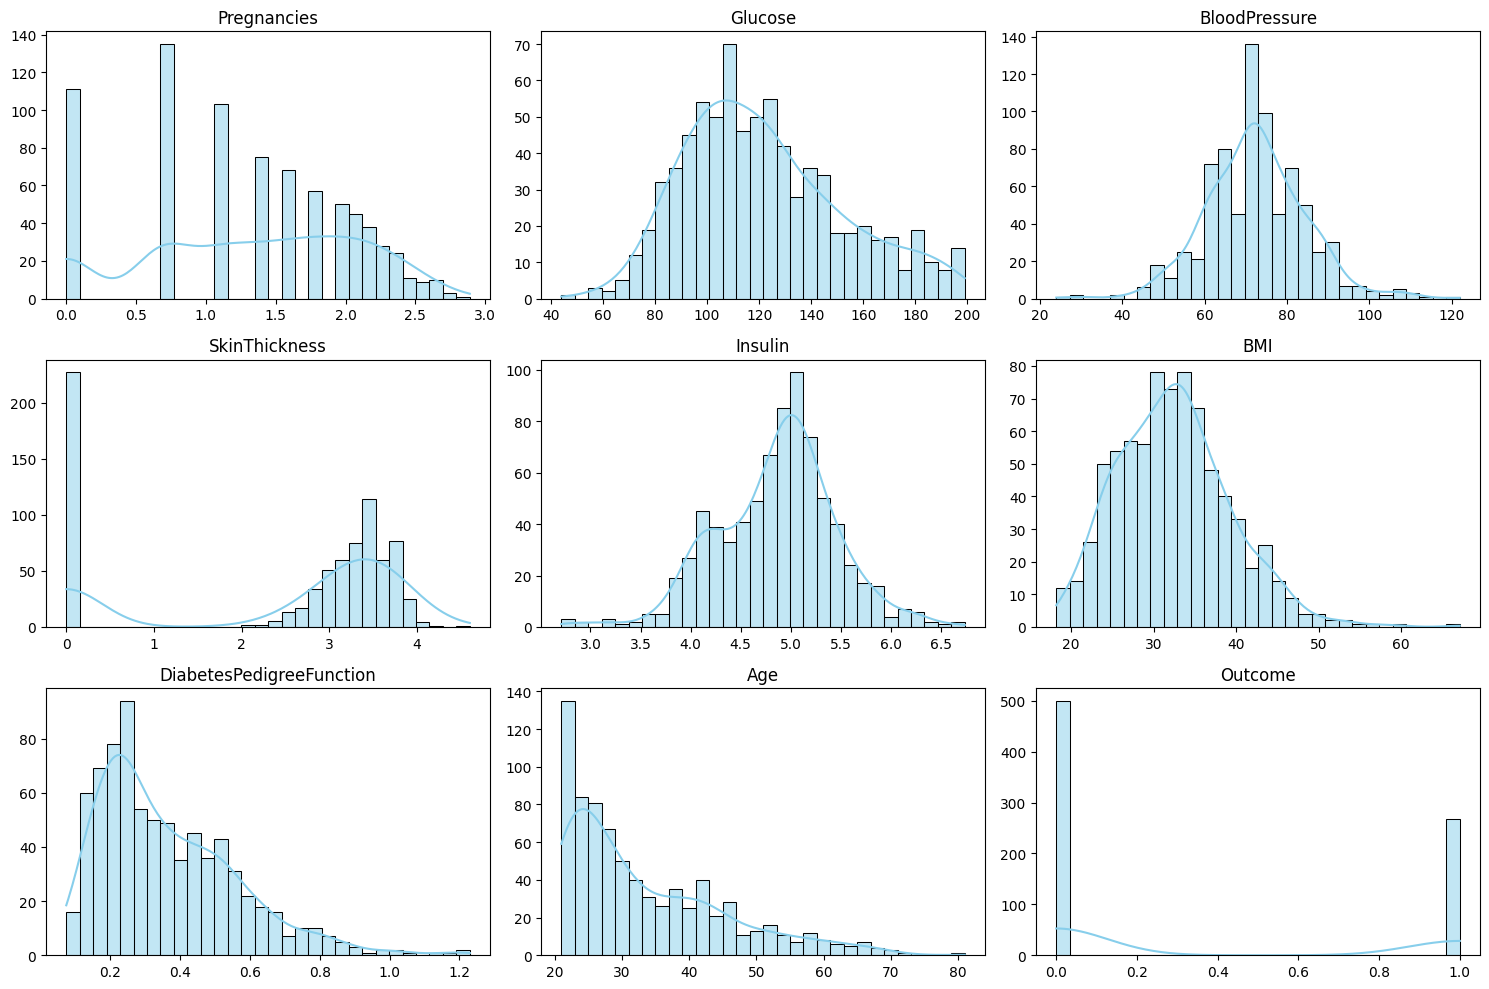

In [95]:
#POST LOG TRANSFORMATION

# List of features to plot
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
            'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Set up the grid for subplots
n_cols = 3
n_rows = (len(features) + n_cols - 1) // n_cols  # calculate rows needed
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()  # flatten to 1D array for easy iteration

# Loop through features and plot histogram for each
for i, feature in enumerate(features):
    sns.histplot(df[feature], kde=True, bins=30, ax=axes[i], color='skyblue')
    axes[i].set_title(feature)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Data prep for ML

In [96]:
X_n= df.iloc[:,:-1] #This line creates a new DataFrame X containing all the rows and all columns except the last column from the DataFrame df. Essentially, it's selecting all the features (independent variables) and excluding the 'Price' column.
Y_n = df['Outcome']

In [97]:
# Correlation matrix
correlation_matrix = df.corr()
# Correlation with the target column 'Outcome'
correlation_with_target = correlation_matrix['Outcome'].sort_values(ascending=True)
print("Correlation with target Outcome:\n", correlation_with_target)



Correlation with target Outcome:
 SkinThickness              -0.007718
BloodPressure               0.165723
Pregnancies                 0.179739
DiabetesPedigreeFunction    0.179950
Age                         0.238356
BMI                         0.312038
Insulin                     0.363786
Glucose                     0.492782
Outcome                     1.000000
Name: Outcome, dtype: float64


With the data processing on misisng values completed, we can clearly see the correlation values have changed from what was originally observed. We can see Insulin, in particular, has improved its correlation score w.r.t Outcome.  From clinical terms, I see a lot of value in this improvement because Insulin levels are a good predictor of diabetes. SkinThickness seems to have nea-zero correlation after all data-preprocessing. Not an issue becuase I wouldn't consider it has an important measure of diabetic tendency (in the likes of glucose or insulin)

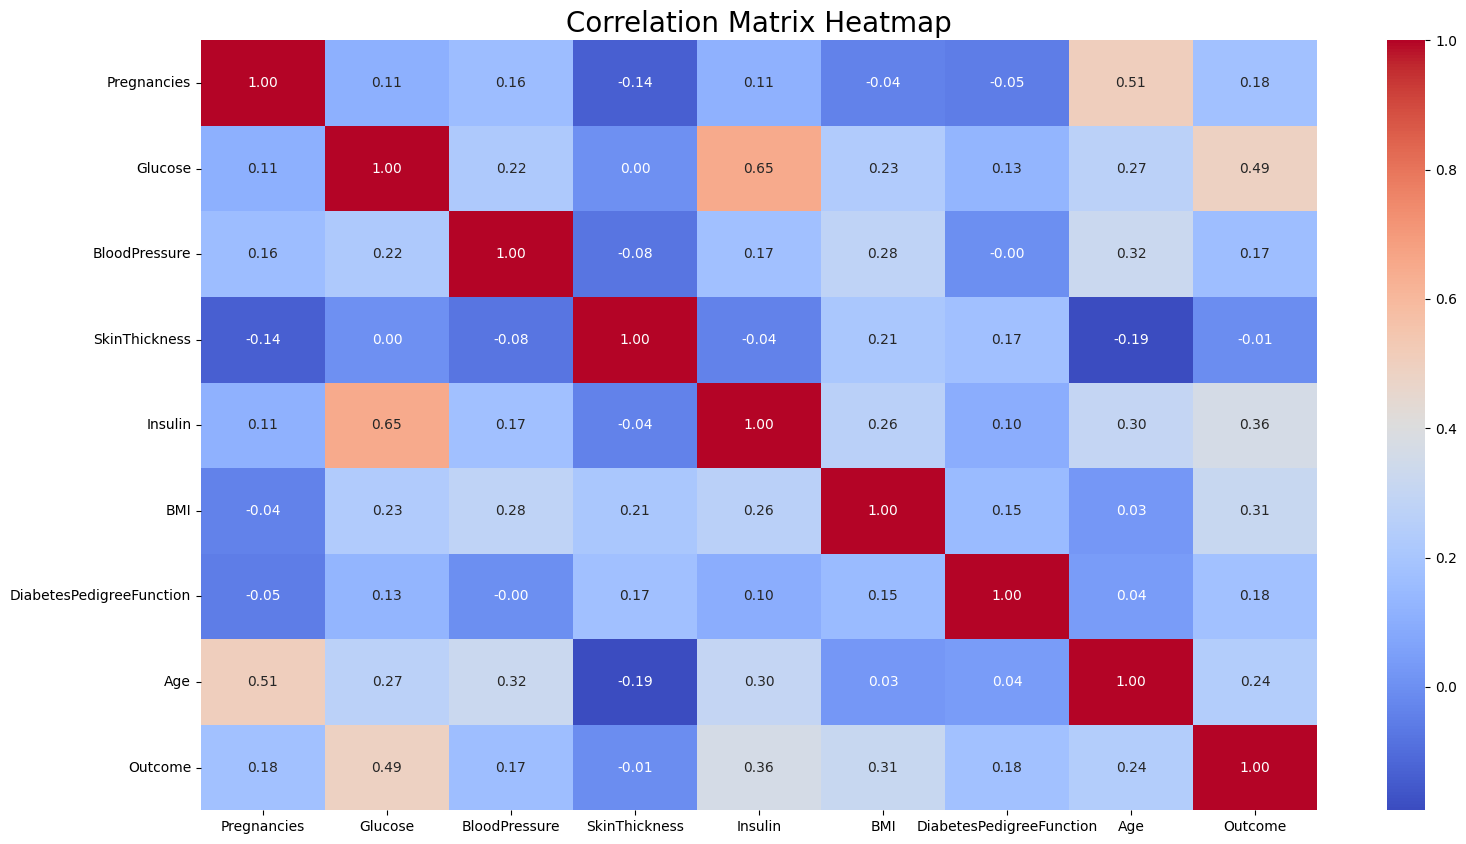

In [33]:
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f') #uses seaborn (sns) library, annot helps to display correlaton value with the each cells itself
#fmt=.2f is for displaying values with 2 decimal places
plt.title('Correlation Matrix Heatmap', fontsize=20)
plt.show()

In [98]:
x_train,X_, y_train, y_= train_test_split(X_n,Y_n, test_size=0.3, random_state=42)
x_cv, x_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.5, random_state=42)
del X_, y_

print(f"shape of X_train, {x_train.shape}")

print(f"shape of X_test, {x_test.shape}")

print(f"shape of X_cv, {x_cv.shape}")

print(f"shape of y_train (target), {y_train.shape}")
print(f"shape of y_test (target), {y_test.shape}")
print(f"shape of y_cv (target), {y_cv.shape}")


shape of X_train, (537, 8)
shape of X_test, (116, 8)
shape of X_cv, (115, 8)
shape of y_train (target), (537,)
shape of y_test (target), (116,)
shape of y_cv (target), (115,)


In [35]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
334,0.693147,95.0,60.0,2.944439,4.077537,23.9,0.231112,22.0
139,1.791759,105.0,72.0,3.401197,5.786897,36.9,0.147558,28.0
485,0.000000,135.0,68.0,3.761200,5.525453,42.3,0.311154,24.0
547,1.609438,131.0,68.0,3.091042,5.117994,33.1,0.148420,28.0
18,0.693147,103.0,30.0,3.663562,4.430817,43.3,0.168054,33.0


In [196]:
y_train.head()

334    0
139    0
485    1
547    0
18     0
Name: Outcome, dtype: int64

In [99]:
from sklearn.preprocessing import StandardScaler
scaler=  StandardScaler()


x_train_nor = scaler.fit_transform(x_train) # Normalizing our data. Also scaling functions convert df to numpy arrays
x_test_nor = scaler.transform(x_test)
x_cv_nor = scaler.transform(x_cv)

print(x_train_nor) # Print the normalized data

[[-0.78835777 -0.89454593 -1.00322115 ... -1.20382556 -0.65685274
  -0.94861028]
 [ 0.65890698 -0.56247683 -0.01909007 ...  0.66449801 -1.0724823
  -0.43466673]
 [-1.70148016  0.43373048 -0.34713376 ...  1.44057087 -0.25869043
  -0.77729576]
 ...
 [ 1.45740431 -0.69530447  1.12906286 ...  1.91483763  1.96873687
   0.42190587]
 [-1.70148016  0.63297195 -0.01909007 ...  1.45494259 -0.87886973
  -0.34900947]
 [-1.70148016  0.10166138  1.9491721  ... -1.40502964 -0.64896317
  -1.03426754]]


In [37]:
print(f"Computed mean of the training set: {scaler.mean_}")
print(f"Computed standard deviation of the training set: {scaler.scale_}")

Computed mean of the training set: [  1.29158609 121.93854749  72.23277467   2.37270789   4.86407284
  32.27635009   0.36315906  33.0744879 ]
Computed standard deviation of the training set: [ 0.75909559 30.11421375 12.19349761  1.53596389  0.57926876  6.95810951
  0.20103035 11.67443374]


In [38]:
x_train_nor.shape

(537, 8)

In [39]:
x_train_nor_df= pd.DataFrame(x_train_nor) # scaling functions convert df to numpy arrays, so convert back to dataframe
x_train_nor_df.describe()

,0,1,2,3,4,5,6,7
count,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02
mean,2.414787e-16,2.083994e-16,-4.167988e-16,-7.939025e-17,3.010214e-16,6.946647e-17,-2.315549e-16,-2.646342e-16
std,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00
min,-1.701480e+00,-2.588098e+00,-3.955614e+00,-1.544768e+00,-3.721973e+00,-2.023014e+00,-1.432876e+00,-1.034268e+00
25%,-7.883578e-01,-7.285114e-01,-6.751775e-01,-1.544768e+00,-6.288328e-01,-7.439305e-01,-7.324344e-01,-7.772958e-01
50%,1.247646e-01,-1.639939e-01,-1.909007e-02,5.243261e-01,8.386789e-02,-3.971626e-02,-2.260000e-01,-3.490095e-01
75%,8.619785e-01,5.665581e-01,6.369973e-01,7.316576e-01,5.830344e-01,6.070111e-01,5.686534e-01,6.788776e-01
max,2.106172e+00,2.558973e+00,4.081456e+00,1.162902e+00,3.241376e+00,5.004757e+00,4.310202e+00,4.105168e+00


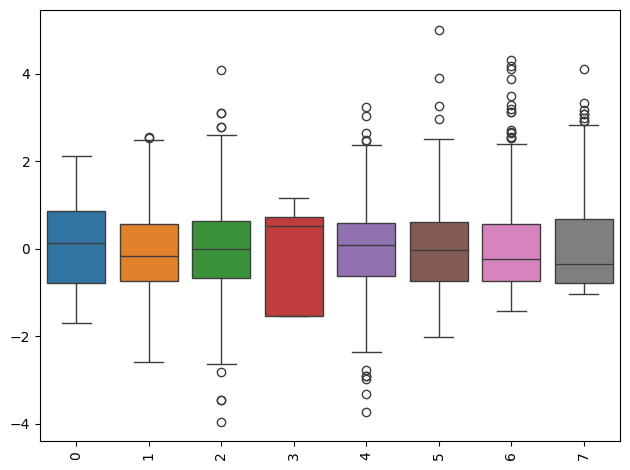

In [40]:
import seaborn as sns
sns.boxplot(data= x_train_nor)

plt.xticks(rotation=90) # Rotate x-axis labels by 90 degrees
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [57]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_nor, y_train = smote.fit_resample(x_train_nor, y_train)
count3= y_train.value_counts()
count3

Outcome
0    349
1    349
Name: count, dtype: int64

### Model 1: Neural networks for diabetes prediction

In [227]:
np.random.seed(50) #this seeding is done to fix the intialization at same point everytime we run the code fro first

tf.random.set_seed(50)


In [228]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.metrics import Recall

model = Sequential([
    Dense(15, activation='relu', name='L1', kernel_regularizer=l2(0.001), input_shape=x_train_nor.shape[1:]),
    Dropout(0.5),  # dropout rate
    Dense(7, activation='relu', name='L2', kernel_regularizer=l2(0.001)),
    Dropout(0.5),  #  dropout rate

    Dense(1, activation='sigmoid', name='L3')
])



# Callbacks for Early Stopping and Reduce Learning Rate
callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True) #stops if no improvement in metric: val_loss for 10 epochs
]




d:\Ash_ML\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


EarlyStopping: Monitors a specific metric (usually validation loss) and stops training if it doesn't improve after a set number of epochs (patience). restore_best_weights=True means that the model will revert to the weights of the epoch with the best performance.

ReduceLROnPlateau: Reduces the learning rate by a factor (here, 0.5) if a monitored metric (usually validation loss) has stopped improving after a set number of epochs (patience).

In [229]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 15)             │           135 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 15)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 7)              │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L3 (Dense)                      │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 255 (1020.00 B)

 Trainable params: 255 (1020.00 B)

 Non-trainable params: 0 (0.00 B)

In [230]:
from tensorflow.keras.metrics import Recall # Import Recall

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy', Recall()]) 
history = model.fit(x_train_nor, y_train, epochs=30, validation_data=(x_cv_nor, y_cv), callbacks=callbacks)

Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5093 - loss: 0.7900 - recall_5: 0.5666 - val_accuracy: 0.4609 - val_loss: 0.7263 - val_recall_5: 0.7568
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4579 - loss: 0.8056 - recall_5: 0.5223 - val_accuracy: 0.4870 - val_loss: 0.7177 - val_recall_5: 0.7568
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5036 - loss: 0.7756 - recall_5: 0.5758 - val_accuracy: 0.5217 - val_loss: 0.7131 - val_recall_5: 0.8108
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5567 - loss: 0.7293 - recall_5: 0.6095 - val_accuracy: 0.5391 - val_loss: 0.7076 - val_recall_5: 0.7297
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5330 - loss: 0.7923 - recall_5: 0.5120 - val_accuracy: 0.5565 - val_loss: 0.7001 - val_recall_5: 0.6757
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5772 - loss: 0.7327 - recall_5: 0.5770 - val_accuracy: 0.6261 - val_loss: 0.6957 - val_recall_5

I chose the best values for hyper parameters that give the lowest loss, and best accuracy/recall after experimenting with multiple sets of hyper paramter values


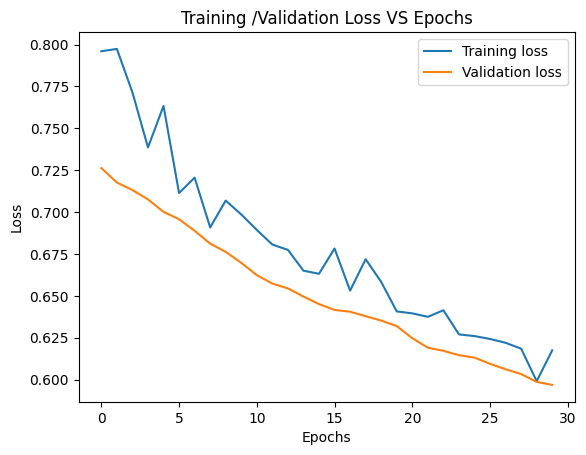

In [231]:

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training /Validation Loss VS Epochs')
plt.show()

In [232]:
test= model.evaluate(x_test_nor, y_test) #evaluating the model using test set


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7001 - loss: 0.5717 - recall_5: 0.6017 


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000019546F77880> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
ANN AUC: 0.8257


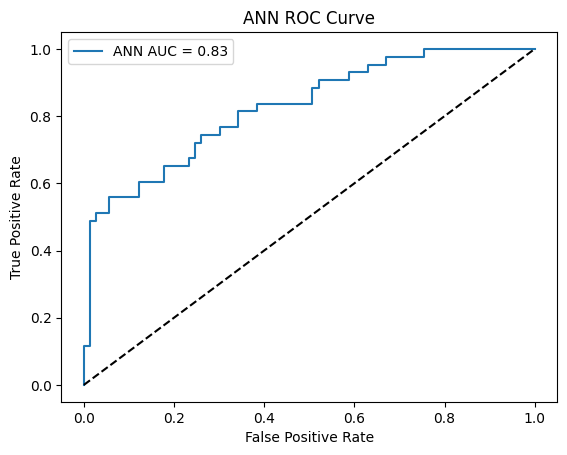

In [233]:
# Calculate AUC/ROC for ANN
y_pred_proba_ann = model.predict(x_test_nor) # Probabilities for class 1
auc_ann = roc_auc_score(y_test, y_pred_proba_ann)
print(f"ANN AUC: {auc_ann:.4f}")

fpr_ann, tpr_ann, thresholds_ann = roc_curve(y_test, y_pred_proba_ann)

plt.plot(fpr_ann, tpr_ann, label=f'ANN AUC = {auc_ann:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ANN ROC Curve')
plt.legend()
plt.show()

In [234]:
from sklearn.metrics import roc_curve

# Assuming you have true labels y_true and predicted probabilities y_scores

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_ann)

# Calculate specificity
specificity = 1 - fpr



# Print the specificity values for each threshold
for i, threshold in enumerate(thresholds):
    if specificity[i] > 0.85 or tpr[i] > 0.85:
        print(f"Threshold: {threshold:.2f}, Specificity: {specificity[i]:.2f}, Sensitivity: {tpr[i]:.2f}")



Threshold: inf, Specificity: 1.00, Sensitivity: 0.00
Threshold: 0.84, Specificity: 1.00, Sensitivity: 0.02
Threshold: 0.76, Specificity: 1.00, Sensitivity: 0.12
Threshold: 0.74, Specificity: 0.99, Sensitivity: 0.12
Threshold: 0.66, Specificity: 0.99, Sensitivity: 0.49
Threshold: 0.66, Specificity: 0.97, Sensitivity: 0.49
Threshold: 0.66, Specificity: 0.97, Sensitivity: 0.51
Threshold: 0.65, Specificity: 0.95, Sensitivity: 0.51
Threshold: 0.63, Specificity: 0.95, Sensitivity: 0.56
Threshold: 0.61, Specificity: 0.88, Sensitivity: 0.56
Threshold: 0.61, Specificity: 0.88, Sensitivity: 0.60
Threshold: 0.41, Specificity: 0.49, Sensitivity: 0.88
Threshold: 0.40, Specificity: 0.48, Sensitivity: 0.88
Threshold: 0.38, Specificity: 0.48, Sensitivity: 0.91
Threshold: 0.36, Specificity: 0.41, Sensitivity: 0.91
Threshold: 0.35, Specificity: 0.41, Sensitivity: 0.93
Threshold: 0.34, Specificity: 0.37, Sensitivity: 0.93
Threshold: 0.33, Specificity: 0.37, Sensitivity: 0.95
Threshold: 0.31, Specificity:

Based on the above model, threshold at 0.42 gives a good sensitivity of 0.93, with a specificity of 0.59. While the specificity is still low, atleast a higher threshold of sensitivity means, not missing out on too many patients affected by diabetes

### Model 2: SVM model for diabetes prediction

### Given below is a test run of Grid SearchCV for the SVM model.


Gamma values: 
 Scale: Uses the inverse of the product of feature count and variance to adjust gamma.
    If scale is passed, then it uses 1 / (n_features * X.var()) as value of gamma. Avg. variance of all features is used
    
Auto: Uses 1 / n_features. Uses only the number of features to set gamma, ignoring feature variance.
May lead to overfitting (high gamma values) for large datasets. 


#### Notes: 

#regularizer defines the flexibility of decision boundary
#kernel defines the type of decision boundary
#gamma defines the influence of a single training example reaches. Low value means tighter decision boundary

In [108]:

import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline as ImbPipeline


Let's use scaled data (without SMOTE). We will run SMOTE inside the SVM pipeline itself to avoid data leaks (into validation sets of GridCV).

In [ ]:
x_train_nor.shape #non-SMOTE data

(537, 8)

In [102]:
# Combine training and CV data for final training
x_train_cv_combined = np.vstack((x_train_nor, x_cv_nor))  # Combine normalized training and CV features
y_train_cv_combined = np.hstack((y_train, y_cv))         # Combine training and CV labels


In [ ]:

print(x_train_cv_combined.shape)
print(y_train_cv_combined.shape)

(652, 8)
(652,)


Running the SVM workflow

In [127]:
svm_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('svc', SVC(probability=True, random_state=42))
])


In [ ]:
# Define the parameter grid
param_grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': ['scale', 'auto'],
    'svc__kernel': ['linear', 'rbf']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # to maintain the class distribution in each fold

# Create a GridSearchCV object with scoring set to 'roc_auc'
grid_search = GridSearchCV(
    estimator=svm_pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring='recall',
    n_jobs=-1,
    verbose=2,
    refit=True
)

# Fit the grid search to the training data (x_train_nor) and CV labels (y_train)
grid_search.fit(x_train_nor, y_train)

# Print the best parameters and best score (AUC on CV data)
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated score:", grid_search.best_score_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
Best cross-validated score: 0.7443812233285917


In [129]:
# Get the best estimator from GridSearchCV
best_svm = grid_search.best_estimator_

best_svm.fit(x_train_cv_combined, y_train_cv_combined)

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('svc',
                 SVC(C=0.1, kernel='linear', probability=True,
                     random_state=42))])

In [130]:
# Predict probabilities on test data
y_pred_svm_prob = best_svm.predict_proba(x_test_nor)[:, 1]

# Convert probabilities to class labels based on a threshold of 0.5
y_pred_svm_class = (y_pred_svm_prob > 0.5).astype(int)

# Evaluate performance metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm_class)
precision_svm = precision_score(y_test, y_pred_svm_class)
recall_svm = recall_score(y_test, y_pred_svm_class)
f1_svm = f1_score(y_test, y_pred_svm_class)
auc_svm = roc_auc_score(y_test, y_pred_svm_prob)

print("Final Test Set Performance:")
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1-Score:", f1_svm)
print(f"AUC: {auc_svm:.4f}")


Final Test Set Performance:
Accuracy: 0.7241379310344828
Precision: 0.6037735849056604
Recall: 0.7441860465116279
F1-Score: 0.6666666666666666
AUC: 0.8146


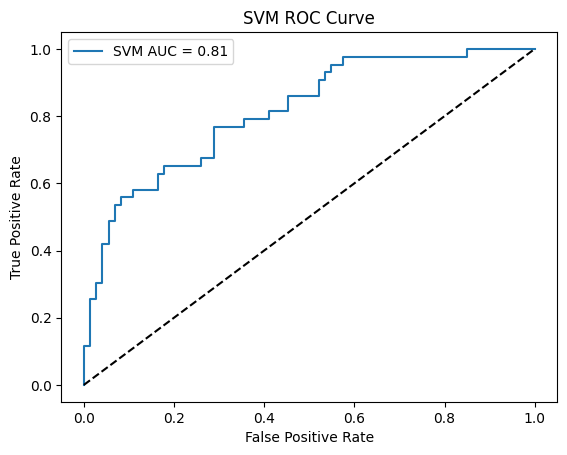


Threshold Analysis:
Threshold: 0.50, Specificity: 0.71, Sensitivity: 0.77
Threshold: 0.47, Specificity: 0.64, Sensitivity: 0.77
Threshold: 0.46, Specificity: 0.64, Sensitivity: 0.79
Threshold: 0.41, Specificity: 0.59, Sensitivity: 0.79
Threshold: 0.40, Specificity: 0.59, Sensitivity: 0.81
Threshold: 0.38, Specificity: 0.55, Sensitivity: 0.81
Threshold: 0.35, Specificity: 0.55, Sensitivity: 0.86
Threshold: 0.27, Specificity: 0.48, Sensitivity: 0.86
Threshold: 0.26, Specificity: 0.48, Sensitivity: 0.91
Threshold: 0.26, Specificity: 0.47, Sensitivity: 0.91
Threshold: 0.25, Specificity: 0.47, Sensitivity: 0.93
Threshold: 0.22, Specificity: 0.45, Sensitivity: 0.93
Threshold: 0.22, Specificity: 0.45, Sensitivity: 0.95
Threshold: 0.22, Specificity: 0.42, Sensitivity: 0.95
Threshold: 0.21, Specificity: 0.42, Sensitivity: 0.98


In [131]:

# Calculate ROC curve values
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_svm_prob)

# Plot ROC curve
plt.plot(fpr_svm, tpr_svm, label=f'SVM AUC = {auc_svm:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend()
plt.show()

specificity_svm = 1 - fpr_svm

print("\nThreshold Analysis:")
for i, threshold in enumerate(thresholds_svm):
    if specificity_svm[i] > 0.30 and tpr_svm[i] > 0.70:
        print(f"Threshold: {threshold:.2f}, Specificity: {specificity_svm[i]:.2f}, Sensitivity: {tpr_svm[i]:.2f}")


SVM results are not bad. The model provides moderate accuracy and recall. But the AUC is close to 0.8, which is very encouraging. The linear Kernel confirms that there is not much non-linearity in the data and that most of the features can be captured using linear models

### Model 3: Elastic net regression for diabetes prediciton

ElasticNetCV(cv=5) does 5-fold cross-validation to find the best alpha and l1_ratio automatically.

l1_ratio=1 → Pure Lasso

l1_ratio=0 → Pure Ridge

0 < l1_ratio < 1 → Elastic Net (a mix of both)

In [133]:
print(x_train_nor.shape) #non-SMOTE data
print(x_train_cv_combined.shape)
print(y_train_cv_combined.shape)

(537, 8)
(652, 8)
(652,)


In [134]:
Elastic_Net_pipe = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('ElasticNet', ElasticNet())
])


In [139]:
param_grid_en = {
    'ElasticNet__alpha': [0.01, 0.1, 1, 10],# Regularization strength
    'ElasticNet__l1_ratio': [0, 0.25, 0.5, 0.75, 1] # ElasticNet mixing parameter (0=Ridge, 1=Lasso)
}


In [141]:




cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # to maintain the class distribution in each fold

# Create a GridSearchCV object with scoring set to 'roc_auc'
grid_search_en = GridSearchCV(
    estimator=Elastic_Net_pipe,
    param_grid=param_grid_en,
    cv=cv,
    scoring='recall',
    n_jobs=-1,
    verbose=2,
    refit=True
)


# Fit the grid search to the training data (x_train_nor) and CV labels (y_train)
grid_search_en.fit(x_train_nor, y_train)

# Print the best parameters and best score (AUC on CV data)
print("Best parameters:", grid_search_en.best_params_)
print("Best cross-validated score:", grid_search_en.best_score_)



Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'ElasticNet__alpha': 0.01, 'ElasticNet__l1_ratio': 0}
Best cross-validated score: nan


d:\Ash_ML\venv\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  warnings.warn(
d:\Ash_ML\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.420e+01, tolerance: 1.745e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Fitting 5 folds for each of 20 candidates, totalling 100 fits


d:\Ash_ML\venv\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  warnings.warn(
d:\Ash_ML\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.852e+01, tolerance: 2.135e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Best ElasticNet Parameters: {'ElasticNet__alpha': 0.01, 'ElasticNet__l1_ratio': 0}
Accuracy: 0.7327586206896551
Recall: 0.7906976744186046
F1-Score: 0.6868686868686869
ElasticNet AUC: 0.8063


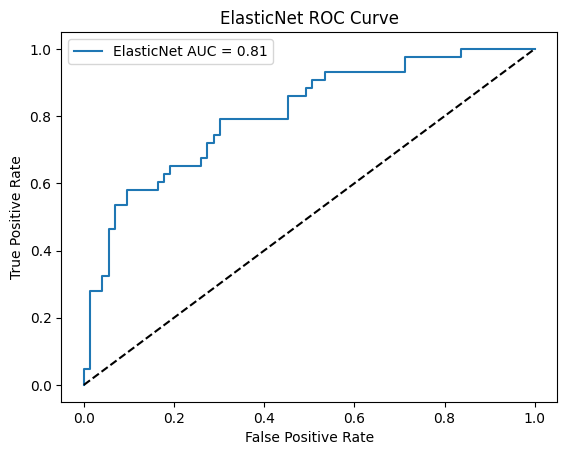

Threshold: 0.52, Specificity: 0.73, Sensitivity: 0.72
Threshold: 0.51, Specificity: 0.71, Sensitivity: 0.72
Threshold: 0.51, Specificity: 0.71, Sensitivity: 0.74
Threshold: 0.50, Specificity: 0.70, Sensitivity: 0.74
Threshold: 0.50, Specificity: 0.70, Sensitivity: 0.79
Threshold: 0.40, Specificity: 0.55, Sensitivity: 0.79
Threshold: 0.38, Specificity: 0.55, Sensitivity: 0.86
Threshold: 0.34, Specificity: 0.51, Sensitivity: 0.86
Threshold: 0.32, Specificity: 0.51, Sensitivity: 0.88
Threshold: 0.32, Specificity: 0.49, Sensitivity: 0.88
Threshold: 0.32, Specificity: 0.49, Sensitivity: 0.91
Threshold: 0.30, Specificity: 0.47, Sensitivity: 0.91
Threshold: 0.30, Specificity: 0.47, Sensitivity: 0.93


In [ ]:
# Combine training and CV data for final training
x_train_cv_combined = np.vstack((x_train_nor, x_cv_nor))  # Combine normalized training and CV features
y_train_cv_combined = np.hstack((y_train, y_cv))         # Combine training and CV labels

grid_search_en.fit(x_train_cv_combined, y_train_cv_combined)
best_elastic_en = grid_search_en.best_estimator_



# Predict using the best model
y_pred_en = best_elastic_en.predict(x_test_nor)

# Convert probabilities to class labels based on a threshold of 0.5
y_pred_en_class = (y_pred_en > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_en_class)
recall = recall_score(y_test, y_pred_en_class)
f1 = f1_score(y_test, y_pred_en_class)
auc_en = roc_auc_score(y_test, y_pred_en)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1-Score:", f1)
print(f"ElasticNet AUC: {auc_en:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds_en = roc_curve(y_test, y_pred_en)
plt.plot(fpr, tpr, label=f'ElasticNet AUC = {auc_en:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ElasticNet ROC Curve')
plt.legend()
plt.show()

# Calculate specificity

specificity = 1 - fpr

# Print the specificity and sensitivity values for each threshold
for i, threshold in enumerate(thresholds_en):
    if specificity[i] > 0.30 and tpr[i] > 0.70:
        print(f"Threshold: {threshold:.2f}, Specificity: {specificity[i]:.2f}, Sensitivity: {tpr[i]:.2f}")

# XGBoost model for diabetes prediciton

In [44]:
### Log transformation on skewed data
X_n= df.iloc[:,:-1] #This line creates a new DataFrame X containing all the rows and all columns except the last column from the DataFrame df. Essentially, it's selecting all the features (independent variables) and excluding the 'Price' column.
Y_n = df['Outcome']


x_train_xgb,X_, y_train_xgb, y_= train_test_split(X_n,Y_n, test_size=0.3, random_state=42)
x_cv_xgb, x_test_xgb, y_cv_xgb, y_test_xgb = train_test_split(X_, y_, test_size=0.5, random_state=42)
del X_, y_



print(f"shape of X_train, {x_train.shape}")

print(f"shape of X_test, {x_test.shape}")

print(f"shape of X_cv, {x_cv.shape}")

print(f"shape of y_train (target), {y_train.shape}")
print(f"shape of y_test (target), {y_test.shape}")
print(f"shape of y_cv (target), {y_cv.shape}")


shape of X_train, (537, 8)
shape of X_test, (116, 8)
shape of X_cv, (115, 8)
shape of y_train (target), (537,)
shape of y_test (target), (116,)
shape of y_cv (target), (115,)


People generally use unscaled data sets for the XGBoost model since it can handle outliers because XGBoost (and all tree-based models like Random Forest, LightGBM, etc.) works by splitting the data based on feature thresholds, not by calculating distances like in linear models. But in our case, since we use SMOTE for balancing the dataset, it is better to use scaled values itself for XGBoost as well.

Why put SMOTE inside the pipeline?
To prevent data leakage during cross-validation.
If you apply SMOTE before CV, synthetic samples could leak information from test folds → overoptimistic results.
Putting it inside ensures that SMOTE is applied only on the training part of each CV fold.

In [62]:

# Define the XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1)


pipeline = Pipeline([
    ('xgb', xgb_model)
])

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 75, 100, 150, 175, 200],  # Number of trees
    'learning_rate': [0.01, 0.1, 0.2],  # Step size for weight updates
    'max_depth': [ 3,5,7,10,15]  # Tree depth
}

# 5-fold Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=cv, scoring='recall', n_jobs=-1)

# Fit the model with cross-validation
#grid_search_xgb.fit(x_train_nor, y_train_xgb)

# Get the best model
#best_xgb = grid_search_xgb.best_estimator_

# Print best parameters
#print("Best XGBoost Parameters:", grid_search_xgb.best_params_)

grid_search_xgb.fit(x_train_nor, y_train)

# Get the best model
best_xgb = grid_search_xgb.best_estimator_

# Print best parameters
print("Best XGBoost Parameters:", grid_search_xgb.best_params_)


d:\Ash_ML\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:34:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best XGBoost Parameters: {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 100}


d:\Ash_ML\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:34:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Set Results:
Accuracy: 0.7672413793103449
Precision: 0.66
Recall: 0.7674418604651163
F1-Score: 0.7096774193548387
XGBoost AUC: 0.8128


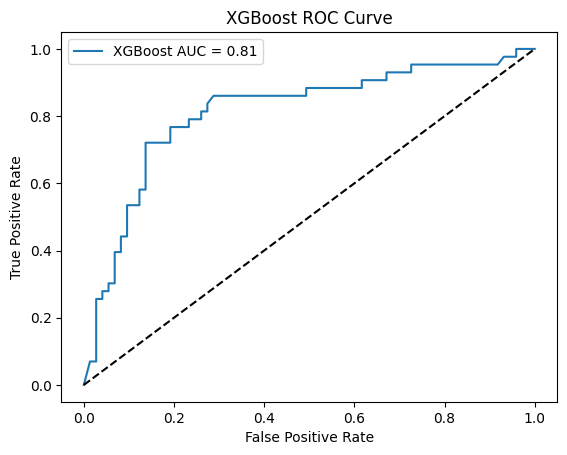

Threshold: 0.56, Specificity: 0.86, Sensitivity: 0.72
Threshold: 0.52, Specificity: 0.81, Sensitivity: 0.72
Threshold: 0.51, Specificity: 0.81, Sensitivity: 0.77
Threshold: 0.50, Specificity: 0.77, Sensitivity: 0.77
Threshold: 0.49, Specificity: 0.77, Sensitivity: 0.79
Threshold: 0.44, Specificity: 0.74, Sensitivity: 0.79
Threshold: 0.44, Specificity: 0.74, Sensitivity: 0.81
Threshold: 0.43, Specificity: 0.73, Sensitivity: 0.81
Threshold: 0.43, Specificity: 0.73, Sensitivity: 0.84
Threshold: 0.38, Specificity: 0.71, Sensitivity: 0.86
Threshold: 0.27, Specificity: 0.51, Sensitivity: 0.86
Threshold: 0.26, Specificity: 0.51, Sensitivity: 0.88
Threshold: 0.22, Specificity: 0.38, Sensitivity: 0.88
Threshold: 0.22, Specificity: 0.38, Sensitivity: 0.91
Threshold: 0.21, Specificity: 0.36, Sensitivity: 0.91
Threshold: 0.21, Specificity: 0.33, Sensitivity: 0.91
Threshold: 0.21, Specificity: 0.33, Sensitivity: 0.93


In [63]:
# Refitting best model on combined train + cv (recommended) before final test
#x_train_cv_combined = np.vstack((x_train_xgb, x_cv_xgb))  
#y_train_cv_combined = np.hstack((y_train, y_cv))

x_train_cv_combined = np.vstack((x_train_nor, x_cv_nor))  # Combine normalized training and CV features
y_train_cv_combined = np.hstack((y_train, y_cv))         # Combine training and CV labels

# Retrain the best model on combined training + CV data
best_xgb.fit(x_train_cv_combined, y_train_cv_combined)

#Testing with 'Test' data:
y_pred_xgb_prob = best_xgb.predict_proba(x_test_nor)[:, 1]  # Probabilities for class 1
y_pred_xgb_class = (y_pred_xgb_prob > 0.5).astype(int)  # Convert to class labels

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_xgb_class)
precision = precision_score(y_test, y_pred_xgb_class)
recall = recall_score(y_test, y_pred_xgb_class)
f1 = f1_score(y_test, y_pred_xgb_class)
auc = roc_auc_score(y_test, y_pred_xgb_prob)  # AUC score

print("Test Set Results:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print(f"XGBoost AUC: {auc:.4f}")

# Plot ROC Curve
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_xgb_prob)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend()
plt.show()

# Calculate specificity_xgb
specificity_xgb = 1 - fpr_xgb

# Print the specificity and sensitivity values for each threshold
for i, threshold in enumerate(thresholds_xgb):
    if specificity_xgb[i] > 0.30 and tpr_xgb[i] > 0.70:
        print(f"Threshold: {threshold:.2f}, Specificity: {specificity_xgb[i]:.2f}, Sensitivity: {tpr_xgb[i]:.2f}")

### Feature importance (XGBoost)

In [60]:
best_pipeline = grid_search_xgb.best_estimator_
best_pipeline.fit(x_train_cv_combined, y_train_cv_combined)

d:\Ash_ML\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:26:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=-1, num_parallel_tree=None, random_state=42, ...)

In [65]:
xgb_model = best_pipeline
importances = xgb_model.feature_importances_
# if X_test is DataFrame:
if hasattr(x_test_xgb, 'columns'):
    feat_names = x_test_xgb.columns
else:
    feat_names = [f'feat_{i}' for i in range(len(importances))]
imp_df = sorted(zip(feat_names, importances), key=lambda x: x[1], reverse=True)
print("Top features (importance) \n:", imp_df[:10])

Top features (importance) 
: [('Glucose', 0.37282515), ('BMI', 0.1362408), ('Insulin', 0.13596012), ('Age', 0.12070829), ('DiabetesPedigreeFunction', 0.07187264), ('Pregnancies', 0.06393007), ('BloodPressure', 0.05244149), ('SkinThickness', 0.04602139)]



Summary of results: 

1. AUC - 0.81 is solid for a clinical screening-style classifier on typical diabetes datasets — model discriminates positives from negatives reasonably well.

2. Precision/recall and F1 show a balanced operating point at threshold ~0.5 (precision ~0.66, recall ~0.77). That’s a reasonable trade-off if goal is to both detect many positives and keep false alarms moderate.

3. We can clearly see the glucose, BMI and Insulin are the key features found to influence diabetes prediction. This Feature ranking is clinically plausible.

### Pickle the models

In [105]:
import os
import pickle

# Create the directory if it doesn't exist
os.makedirs('models3', exist_ok=True)

# Save the scaler
pickle.dump(scaler, open('models3/diabetes3_scaler.pkl', 'wb'))

# Save the ElasticNet model
pickle.dump(best_elastic_en, open('models3/diabetes3_ene.pkl', 'wb'))

# Save the SVM model
pickle.dump(best_svm, open('models3/diabetes3_svm.pkl', 'wb'))

# Save the XGBoost model
pickle.dump(best_xgb, open('models3/diabetes3_xgb.pkl', 'wb'))

# Save the ANN model
model.save('models3/diabetes3_ann.h5')

In [ ]:
scaler


StandardScaler()

In [ ]:
model

NameError: name 'model' is not defined

In [ ]:
model_svm

SVC(C=1, gamma=1, probability=True)

In [ ]:
model_en

ElasticNetCV(cv=5)

In [ ]:
import pickle
pickle.dump(scaler,open('models3/diabetes3_scaler.pkl', 'wb'))
pickle.dump(model_en,open('models3/diabetes3_ene.pkl', 'wb'))
pickle.dump(model_svm,open('models3/diabetes3_svm.pkl', 'wb'))

In [ ]:
model.save('models3/diabetes3_ann.h5')
